### Reg. no.: 2020331057
### Name: AL-AMIN
### Course Code: CSE-326

## Import Required Libraries

In [42]:
import pyaudio
import wave
import numpy as np
import matplotlib.pyplot as plt

In [54]:
duration = 5            # Duration in seconds
sampling_rate = 44100   # Sampling rate in Hz
chunk_size = 1024       # Number of frames per buffer
audio_format = pyaudio.paInt16  # 16-bit resolution
channels = 1            # Mono audio

In [55]:
audio = pyaudio.PyAudio()

## Start Recording

In [56]:
print("Recording...")
stream = audio.open(format=audio_format, channels=channels, 
                    rate=sampling_rate, input=True, 
                    frames_per_buffer=chunk_size)
frames = []

for _ in range(0, int(sampling_rate / chunk_size * duration)):
    data = stream.read(chunk_size)
    frames.append(data)

print("Recording complete.")

Recording...
Recording complete.


## Terminate the Audio Stream

In [57]:
stream.stop_stream()
stream.close()
audio.terminate()

## Convert Audio Data to NumPy Array

In [59]:
audio_data = np.frombuffer(b''.join(frames), dtype=np.int32)

# audio_data = np.clip(audio_data, -32768, 32767).astype(np.int16)

## Save the Audio Data to a WAV File

In [60]:
output_filename = "recorded_audio.wav"
with wave.open(output_filename, 'wb') as wf:
    wf.setnchannels(channels)
    wf.setsampwidth(audio.get_sample_size(audio_format))
    wf.setframerate(sampling_rate)
    wf.writeframes(b''.join(frames))

print(f"Audio saved as {output_filename}")

Audio saved as recorded_audio.wav


## Plot the Audio Signal

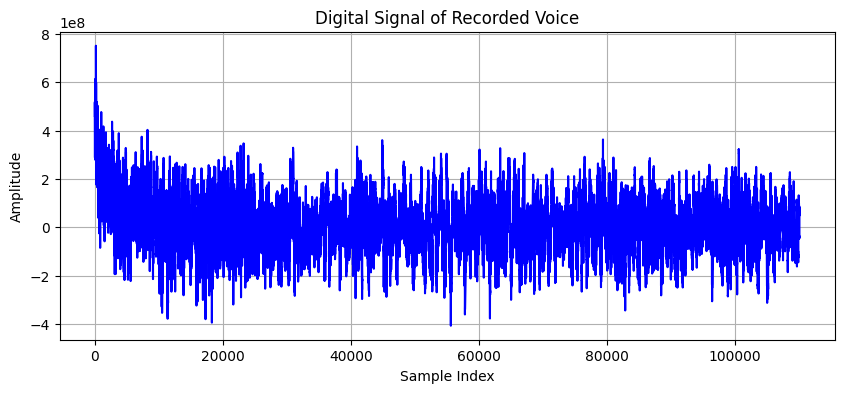

In [61]:
plt.figure(figsize=(10, 4))
plt.plot(audio_data, color='blue')
plt.title('Digital Signal of Recorded Voice')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Display Binary Representation of the First 20 Audio Samples

In [62]:
sample_bits = [bin(sample & 0xFFFF) for sample in audio_data[:20]]
print("Binary representation of the first 20 audio samples:")
for i, bits in enumerate(sample_bits, start=1):
    print(f"Sample {i}: {bits}")

Binary representation of the first 20 audio samples:
Sample 1: 0b1100110010110
Sample 2: 0b1110010110111
Sample 3: 0b1110111101000
Sample 4: 0b1111100011110
Sample 5: 0b1110100101010
Sample 6: 0b1110000011001
Sample 7: 0b1101111011011
Sample 8: 0b1110010000001
Sample 9: 0b1110100100100
Sample 10: 0b1110111001100
Sample 11: 0b10000001000111
Sample 12: 0b1011011011001
Sample 13: 0b1100001111011
Sample 14: 0b1100000111001
Sample 15: 0b1011110011010
Sample 16: 0b1100010011110
Sample 17: 0b1100000101100
Sample 18: 0b1011010111100
Sample 19: 0b1011000001101
Sample 20: 0b1010110011101
